In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.datasets import make_blobs

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)
#%matplotlib notebook

# <center>Modelos de clasificación</center>

Los modelos hasta ahora estudiados han tenido por objetivo predecir el valor de una variable objetivo de tipo numérica y continua a partir de features de diversas naturalezas, sean numéricas o categóricas. Pero existen muchos problemas en los cuales la variable a predecir puede representar una determinada clase, por ejemplo, si queremos predecir si un paciente tendrá o no una determinada enfermedad, o si pretendemos tener un algoritmo que pueda clasificar un dígito escrito a mano tendremos las $10$ opciones correspondientes a los dígitos, qué tipo de galaxia sería una según su morfología etc. A este tipo de problemas se les conoce como problemas de clasificación y los modelos desarrollados en torno a ellos son considerablemente diferentes a aquellos vistos para los problemas de regresión numérica, esto debido a la naturaleza de la variable target que presenta muchas peculiaridades respecto a las otras. 

En el presente notebook estudiaremos algunos de los algoritmos más populares para los modelos de clasificación así como las métricas propias para estos, las cuales son bastante diferentes de las vistas para los problemas de regresión debido a la naturaleza de la variable target. Los temas que trataremos acá son:

* Regresión logística.
* Máquinas de soporte vectorial SVM.
* Naive Bayes.
* KNN.
* Random Forest.
* Decision trees.
* Métricas.

## Regresión logística: <code>LogisticRegression</code>

La regresión logística es uno de los algoritmos de clasificación más conocidos y utilizados, a pesar de ser un algoritmo de regresión lineal generalizada es utilizada para problemas de clasificación. Esta hace uso de la función *logit* para, a partir de la suma ponderada de las variables independientes, predecir la pertenencia de una muestra a una clase u otra conocidas como la *clase positiva* $1$ y la *clase negativa* $0$. Por definición se predice la probabilidad de pertenecer a la clase positiva. 

La probabilidad de pertenecer a la clase positiva $1$ está dada por:

\begin{equation*}
     \hat y_i = P(y_i=1 | \textbf X_i) = \frac{ 1 }{1 + e^{-(\textbf X_i \cdot \textbf w + w_0)}}
\end{equation*}

donde $w_0$ es el término de sesgo o intercepto. Esta función es simétrica respecto a cero y siempre retornará valores en el intervalo $(0,1)$. Para valores pequeños negativos de la suma ponderada de las features tenderá rápidamente a $0$ y para valores grandes positivos tenderá rápidamente a $1$, para $0$ su valor es $0.5$.

El objetivo es entonces hallar los pesos $w_i$ que minimizan la función de costo. A diferencia de los problemas de regresión lineal vistos previamente, la función de costo acá no es el error cuadrático medio, sino que se hace necesario el uso de otra función de costo, conocida como *cross entropy function* (entre otros nombres) que tiene la peculiaridad de ser convexa para este tipo de problema (¿no lo es el error cuadrático medio?). El objetivo de esta regresión es entonces resolver el siguiente problema de optimización:

\begin{equation*}
     \text{Min} \text{ }\text{ C}\sum_{i=1}^{n}-\left[ y_i\log(\hat y_i) + (1-y_i)\log(1-\hat y_i)\right] + r(\textbf w)
\end{equation*}

El coeficiente $C$ se conoce como el inverso de la fuerza de la regularización y $r(\textbf w)$ es un termino de regularización que se puede modificar utilizando el argumento <code>penalty</code> de <code>LogisticRegression</code>. Un alto valor de $C$ indica una alta credibilidad en los datos de entrenamiento mientras un valor pequeño significa que se dará prioridad a la complejidad del modelo y, de alguna manera, quiere decir que no se confía mucho en los datos, es decir, un $C$ lo suficientemente alto hará que la regularización pierda peso, pero si se hace pequeño la regularización lo ganará y se obtendrá un modelo más complejo. El termino de regularización permite recrear una regularización de tipo $L1$, $L2$ o ambas (*elastic*). Un ejemplo de la dinámica entre estos dos argumentos se puede encontrar en la [documentación]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py") de Sklearn. Un [análisis]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html#sphx-glr-auto-examples-linear-model-plot-logistic-path-py") de los efectos de $C$ sobre el modelo.

La probabilidad obtenida $\hat y_i$ se puede utilizar para realizar la clasificación a partir de una frontera de decisión *threshold* que habitualmente se fija en $0.5$.

\begin{equation*}
    \text{Clase} =
        \begin{cases}
            1 &\hat{y_i}\geq0.5\\
            0 &\hat{y_i}<0.5
        \end{cases}
\end{equation*}


Es importante aclarar que esta función de costo se usa para *problemas de clasificación binaria*, para una clasificación multiclase la función de costo cambia y se utiliza la técnica de *OvR*. Para mayor detalle se puede estudiar la [documentación]("https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression") de Sklearn. 

#### Relación entre la regresión logística y la regresión lineal
Como comentario adicional se aclara un poco lo mencionado anteriormente al decir que la regresión logística es una regresión lineal generalizada. Consideremos la regresión lineal habitual

\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

donde el objetivo es hallar los pesos $w_i$, pues bien, si se aplica una función de *"enlace"* $\sigma$ se puede transformar el valor de la anterior suma ponderada en una probabilidad. En el caso de la regresión logística la función $\sigma$ es la función *sigmoide* que tiene forma de "S". Siendo así la función generalizada sería, usando algo de notación matricial:

\begin{equation}
\sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {1}{1 + e^{-(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}} = 
\frac{ 1 }{1 + e^{-(\textbf X_i \cdot \textbf w + w_0)}}
\end{equation}

Por su nauraleza de regresión lineal generalizada, la regresión logística se utiliza para resolver problemas de clasificación en los cuales la frontera de decisión es lineal. Una aplicación interesante es su uso para resolver el problema del *Perceptrón* de una manera un poco más general (no exigiendo separación lineal completa). Más información sobre este último punto en la [documentación]("https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models") de Sklearn.

A continuación algunos ejemplos para ejemplificar el uso de la regresión logística. 

Empecemos por generar un algoritmo que nos permita clasificar entre dos clases a partir de dos features. Los datos serán generados aleatoriamente mediante <code>make_blobs</code>.

In [2]:
# Generación de los datos
blobs_centers = [(0,0), (17,17)]
X_blobs, y_blobs = make_blobs(n_samples=[1000,1000], 
                              centers=blobs_centers,
                              n_features=2,
                              cluster_std=5,
                              shuffle=True,
                              random_state=2357)

df_blobs = pd.DataFrame(dict(x=X_blobs[:,0], y=X_blobs[:,1], label=y_blobs))
df_blobs

,x,y,label
0,1.646220,-2.577030,0
1,-1.103148,-9.453152,0
2,-5.091254,-0.005803,0
3,-1.196507,4.983010,0
4,18.047269,19.277533,1
...,...,...,...
1995,0.947245,-5.273190,0
1996,1.668217,-0.469791,0
1997,18.292044,17.126590,1
1998,17.227802,6.713138,1


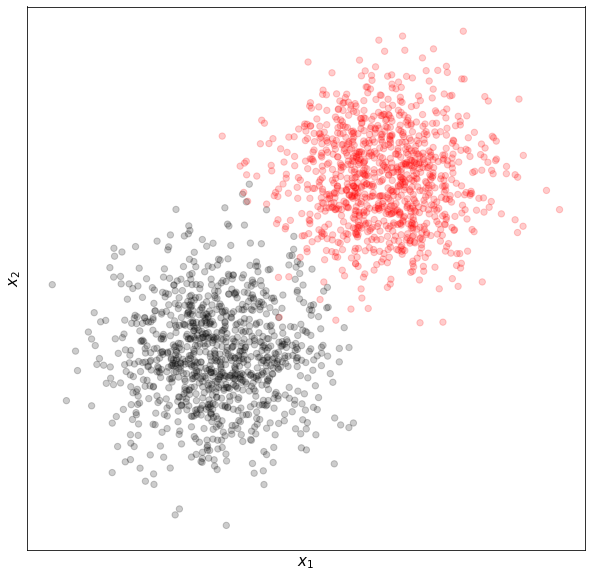

In [3]:
# Gráfico de las bolas
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(X_blobs[:,0], X_blobs[:,1],
           c=["black" if i==0 else "red" for i in y_blobs],
           s=40, alpha=0.2)

ax.set_xticks([])
ax.set_yticks([])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
ax.set_xlabel(f"$x_1$", **font)
ax.set_ylabel(f"$x_2$", **font)
plt.show()

In [4]:
# Datos de entrenamiento y prueba
(X_train_blobs, X_test_blobs,
y_train_blobs, y_test_blobs) = train_test_split(X_blobs, y_blobs, test_size=0.2, random_state=12357)

In [5]:
# Estimador y predictor
best_C_blobs = LogisticRegressionCV(Cs=np.linspace(1e-5, 100, 100))\
                                    .fit(X=X_train_blobs,
                                         y=y_train_blobs)\
                                    .C_[0]

logr_blobs = LogisticRegression(C=best_C_blobs, solver='liblinear')

# Entrenamiento
logr_blobs.fit(X_train_blobs, y_train_blobs)

LogisticRegression(C=1.010110909090909, solver='liblinear')

Veamos gráficamente la clasificación realizada por el modelo.

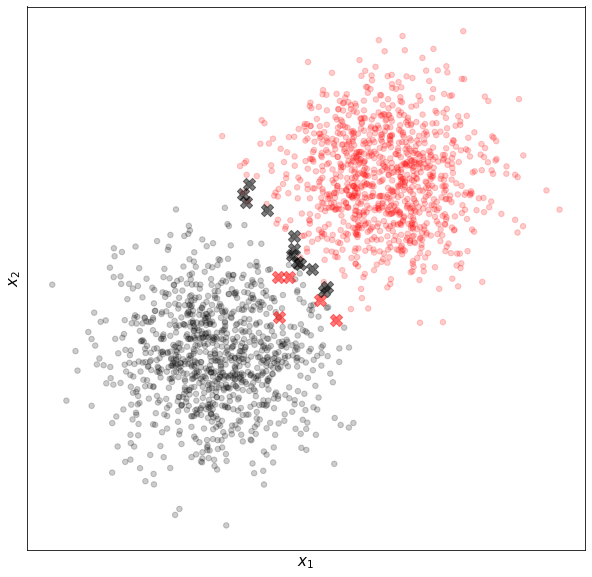

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

# predicciones malas
X_blobs_bad_ped, y_blobs_bad_pred = (X_blobs[y_blobs!=logr_blobs.predict(X_blobs)], 
                                     y_blobs[y_blobs!=logr_blobs.predict(X_blobs)])

# plot todos los puntos
ax.scatter(X_blobs[:,0], X_blobs[:,1],
           c=["black" if i==0 else "red" for i in y_blobs],
           s=30, alpha=0.2)

# plot malas predicciones
for i in range(len(y_blobs_bad_pred)):
    ax.scatter(X_blobs_bad_ped[:,0][i], X_blobs_bad_ped[:,1][i],
               c=["black" if y_blobs_bad_pred[i]==0 else "red"],
               marker="X",
               s=150, alpha=0.5)

ax.set_xticks([])
ax.set_yticks([])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
ax.set_xlabel(f"$x_1$", **font)
ax.set_ylabel(f"$x_2$", **font)
plt.show()